In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rainfall-in-india/district wise rainfall normal.csv
/kaggle/input/rainfall-in-india/rainfall in india 1901-2015.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
path = "../input/rainfall-in-india/rainfall in india 1901-2015.csv"
data = pd.read_csv(path)
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [5]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4112.000000,4113.000000,4110.000000,4112.000000,4113.000000,4111.000000,4109.000000,4112.000000,4110.000000,4109.000000,4105.000000,4106.000000,4090.000000,4110.000000,4107.000000,4106.000000,4103.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.585371,35.909488,46.959424,67.831168,123.234904,234.710758,269.539667,188.770477,135.408345,99.519134,68.685410,42.369611,903.846565,59.308277,201.316965,707.741531,166.942660
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.350000,175.600000,155.975000,100.525000,14.600000,0.700000,0.100000,804.500000,4.100000,24.050000,573.850000,34.200000
50%,1958.000000,6.000000,6.700000,7.800000,15.700000,36.600000,138.700000,284.800000,259.400000,173.900000,65.200000,9.500000,3.000000,1121.300000,19.200000,74.800000,881.100000,98.200000
75%,1987.000000,22.200000,26.800000,31.300000,49.950000,97.200000,305.150000,418.400000,377.800000,265.800000,148.400000,46.100000,17.500000,1644.775000,50.375000,196.950000,1288.175000,213.500000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [6]:
# Getting to know which SUBDIVISION receives maximum rainfall in India annually
data[['SUBDIVISION', 'ANNUAL']].sort_values(by='ANNUAL', ascending = False).head(20)

,SUBDIVISION,ANNUAL
142,ARUNACHAL PRADESH,6331.1
132,ARUNACHAL PRADESH,6129.0
115,ARUNACHAL PRADESH,5691.4
3602,COASTAL KARNATAKA,5553.9
112,ARUNACHAL PRADESH,5486.3
122,ARUNACHAL PRADESH,5272.7
121,ARUNACHAL PRADESH,5253.2
149,ARUNACHAL PRADESH,5063.5
155,ARUNACHAL PRADESH,4959.3
143,ARUNACHAL PRADESH,4874.7


*Arunachal Pradesh is a clear winner here occupying 18/20 entries.*

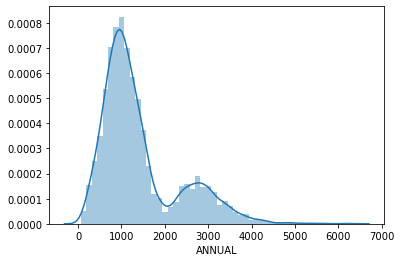

In [7]:
sns.distplot(data['ANNUAL'], hist =True)

*The right skewness in this plot can be explained by some eastern states which are receiving more than enough rain annually.*

*This distribution is not a normal(gaussian) distribution.*

# India

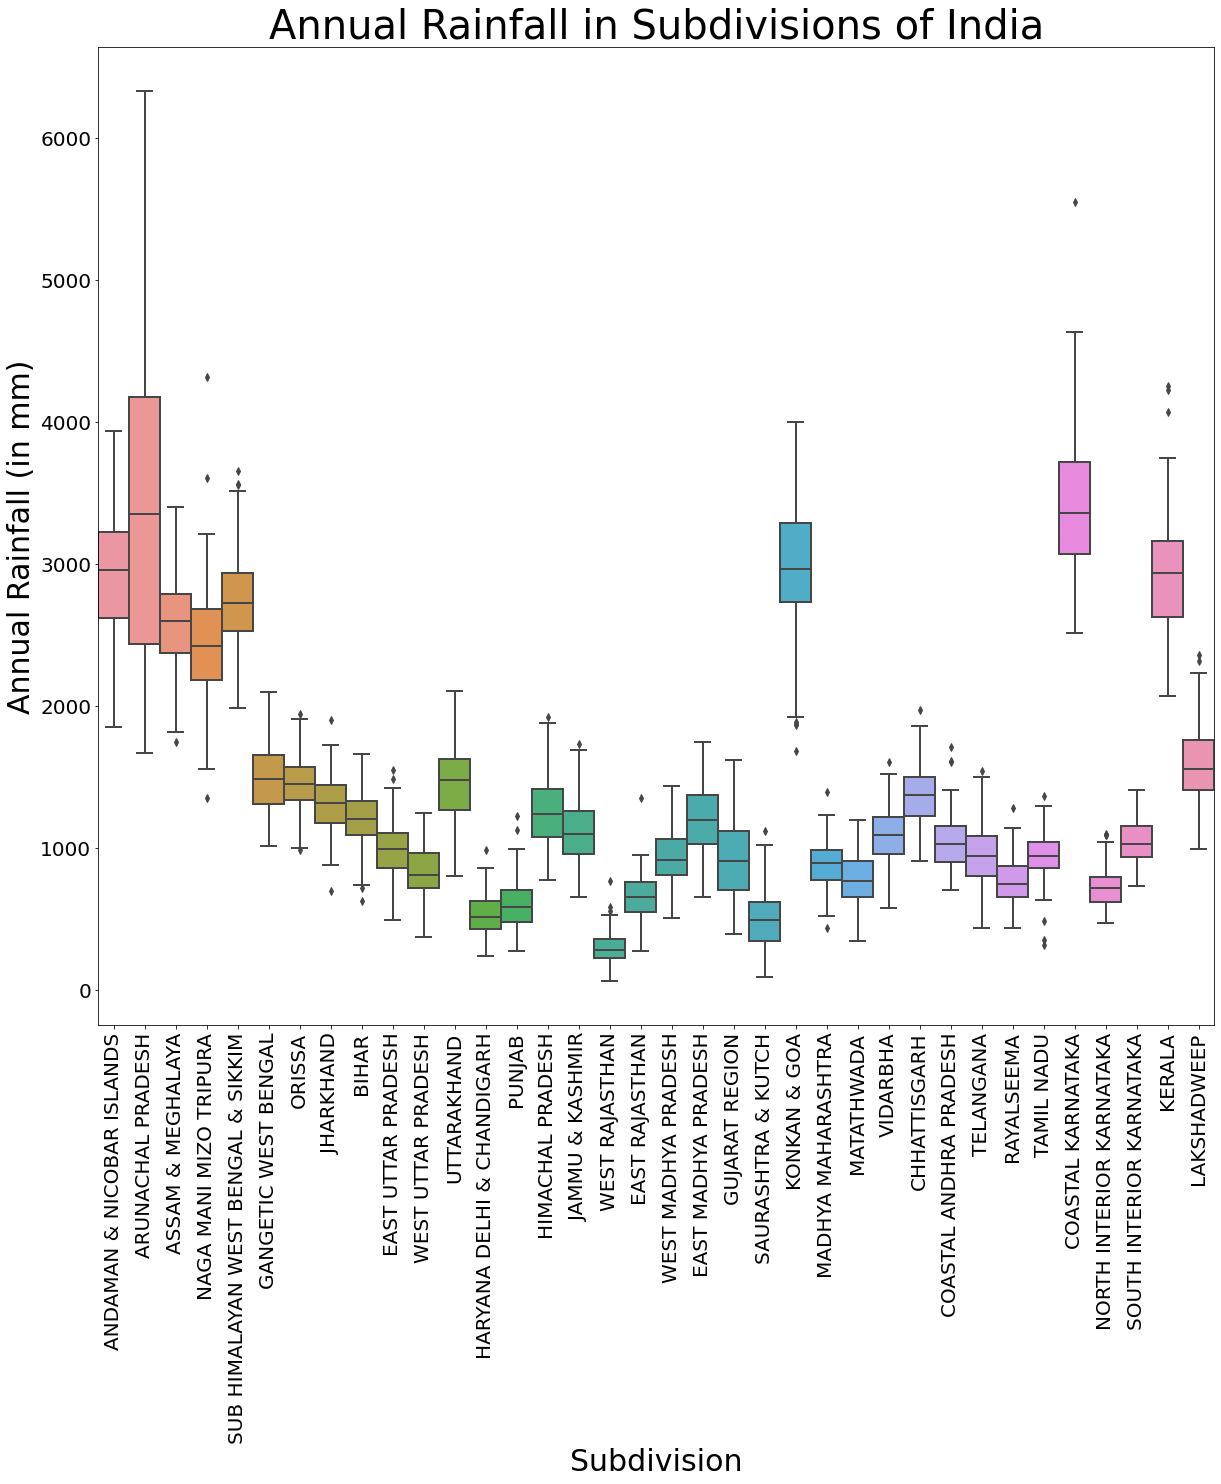

In [8]:
# Annual rainfall in subdivisions of India
plt.figure(figsize=(20,18))
ax = sns.boxplot(x="SUBDIVISION", y="ANNUAL", data=data, width=1, linewidth=2)
ax.set_xlabel('Subdivision',fontsize=30)
ax.set_ylabel('Annual Rainfall (in mm)',fontsize=30)
plt.title('Annual Rainfall in Subdivisions of India',fontsize=40)
ax.tick_params(axis='x', labelsize=20, rotation=90)
ax.tick_params(axis='y', labelsize=20, rotation=0)

*Clearly we can see that Arunachal Pradesh has recorded maximum rainfall annually but its median is similar to Coastal Karnataka.*

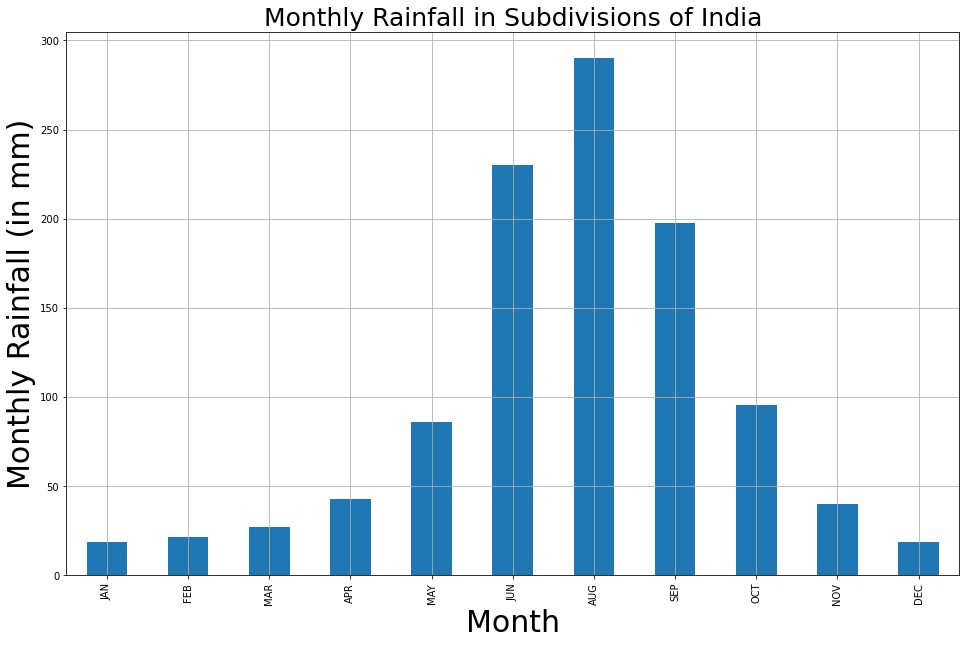

In [9]:
# Average monthly rainfall in India
ax=data[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN', 'AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot.bar(width=0.5, linewidth=2, figsize=(16,10))
plt.xlabel('Month',fontsize=30)
plt.ylabel('Monthly Rainfall (in mm)', fontsize=30)
plt.title('Monthly Rainfall in Subdivisions of India', fontsize=25)
ax.tick_params(labelsize=10)
plt.grid()

*As expected, average rainfall received is maximum in the month of August followed by June and then September.*

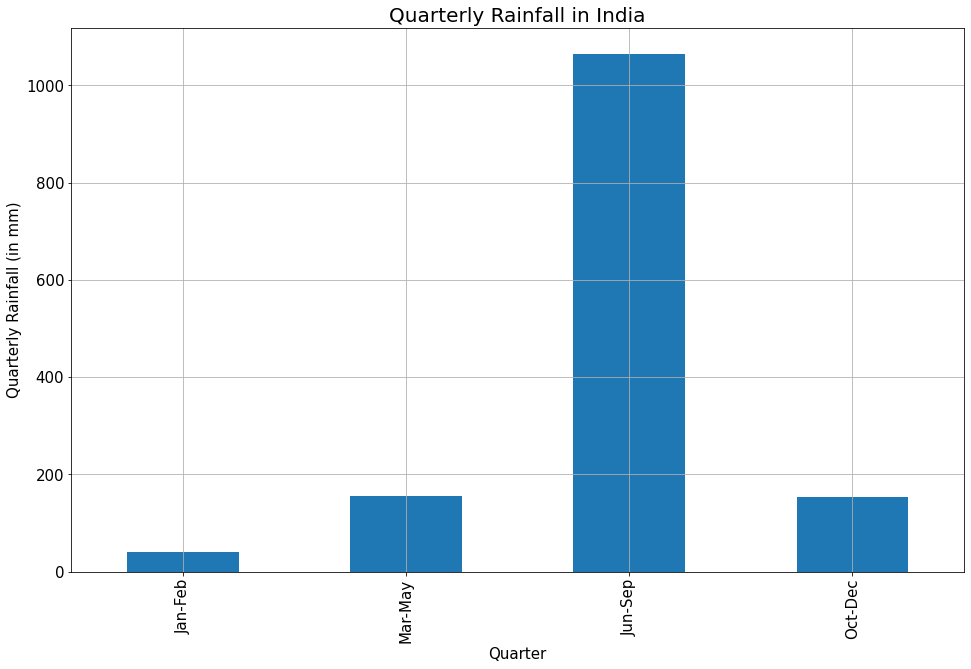

In [10]:
# Average monthly rainfall in India
ax = data[['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']].mean().plot.bar(width=0.5, linewidth=2, figsize=(16,10))
plt.xlabel('Quarter',fontsize=15)
plt.ylabel('Quarterly Rainfall (in mm)', fontsize=15)
plt.title('Quarterly Rainfall in India', fontsize=20)
ax.tick_params(labelsize=15)
plt.grid()

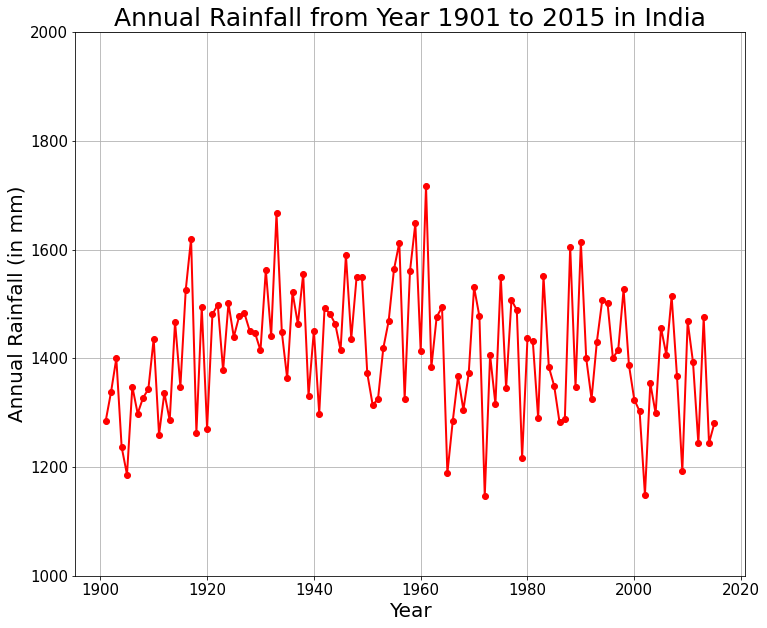

In [11]:
# Visualizing annual rainfall over the years(1901-2015) in India
ax = data.groupby("YEAR").mean()['ANNUAL'].plot(ylim=(1000,2000),color='r',marker='o',linestyle='-',linewidth=2,figsize=(12,10));
plt.xlabel('Year',fontsize=20)
plt.ylabel('Annual Rainfall (in mm)',fontsize=20)
plt.title('Annual Rainfall from Year 1901 to 2015 in India',fontsize=25)
ax.tick_params(labelsize=15)
plt.grid()

*Quite average stats it seems to be. It is due to the rainfall received in some parts of India is extremely low or extremely high.*

# Rajasthan

**Now, let's analyze the rainfall data of Rajasthan(Because I am from Rajasthan!!).**

In [12]:
# Getting rainfall data for Rajasthan
Rajasthan = data.loc[((data['SUBDIVISION'] == 'WEST RAJASTHAN') | (data['SUBDIVISION'] == 'EAST RAJASTHAN'))]
Rajasthan.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
1817,WEST RAJASTHAN,1901,6.7,0.0,1.1,0.0,6.1,3.0,79.0,59.2,1.0,2.1,0.0,0.6,158.9,6.7,7.2,142.2,2.7
1818,WEST RAJASTHAN,1902,0.0,0.0,0.0,0.5,4.0,49.1,27.0,71.3,41.8,1.8,0.0,0.0,195.6,0.0,4.5,189.2,1.8
1819,WEST RAJASTHAN,1903,1.7,1.3,5.5,0.0,4.2,2.7,154.8,87.1,49.3,0.1,0.0,0.5,307.0,3.0,9.7,293.8,0.5
1820,WEST RAJASTHAN,1904,3.8,2.9,16.3,0.7,11.4,14.6,39.8,45.6,21.4,1.4,2.9,7.1,167.9,6.6,28.5,121.4,11.4
1821,WEST RAJASTHAN,1905,6.3,4.8,0.7,1.3,0.3,4.9,30.1,0.6,64.5,0.0,0.0,0.9,114.4,11.0,2.4,100.1,0.9


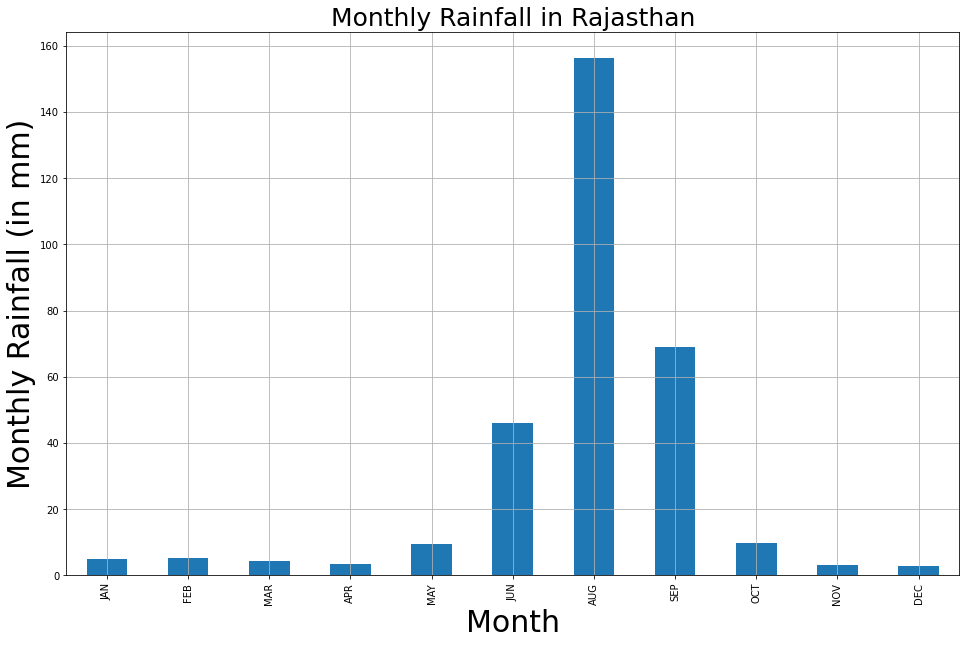

In [13]:
# Average monthly rainfall in Rajasthan
ax = Rajasthan[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN', 'AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot.bar(width=0.5, linewidth=2, figsize=(16,10))
plt.xlabel('Month',fontsize=30)
plt.ylabel('Monthly Rainfall (in mm)', fontsize=30)
plt.title('Monthly Rainfall in Rajasthan', fontsize=25)
ax.tick_params(labelsize=10)
plt.grid()

*August happens to be the most rainy month in Rajasthan.*

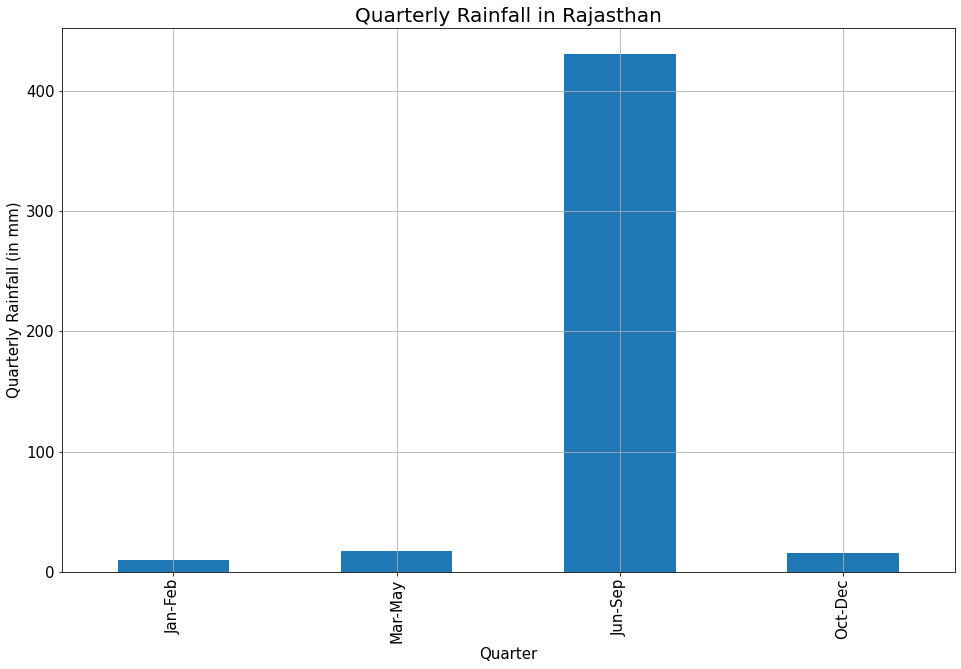

In [14]:
# Average monthly rainfall in Rajasthan
ax=Rajasthan[['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']].mean().plot.bar(width=0.5, linewidth=2, figsize=(16,10))
plt.xlabel('Quarter',fontsize=15)
plt.ylabel('Quarterly Rainfall (in mm)', fontsize=15)
plt.title('Quarterly Rainfall in Rajasthan', fontsize=20)
ax.tick_params(labelsize=15)
plt.grid()

*Only Jun-Sep seems to have received maximum rainfall, that too is minimum as compared to other subdivisions.*

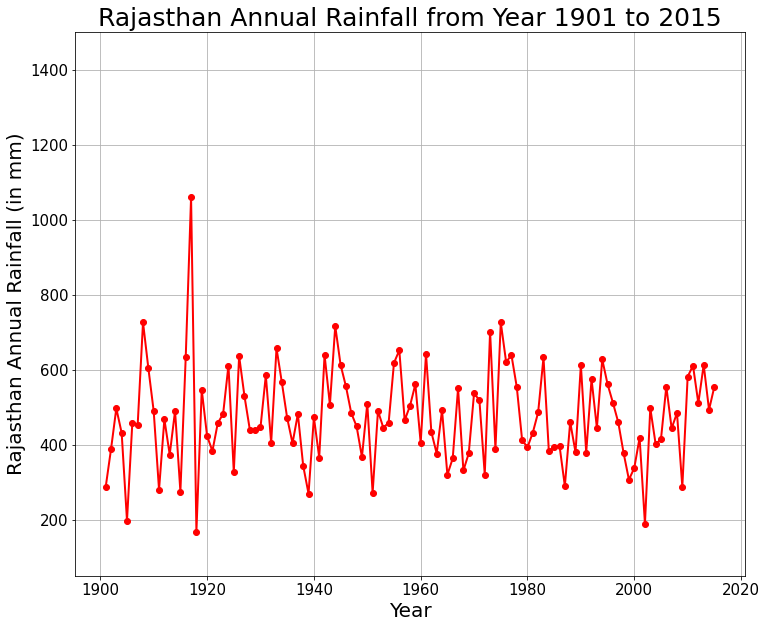

In [15]:
# Visualizing annual rainfall over the years(1901-2015) in Rajasthan
ax = Rajasthan.groupby("YEAR").mean()['ANNUAL'].plot(ylim=(50,1500),color='r',marker='o',linestyle='-',linewidth=2,figsize=(12,10));
plt.xlabel('Year',fontsize=20)
plt.ylabel('Rajasthan Annual Rainfall (in mm)',fontsize=20)
plt.title('Rajasthan Annual Rainfall from Year 1901 to 2015',fontsize=25)
ax.tick_params(labelsize=15)
plt.grid()

*Look at the stats as the highest rainfall recorded is around 1500mm and the rest is below 800mm. Surely, it is receiving very much less rainfall than some of the eastern states' minimum recorded rainfall.*
* Also, it seems that the highest rainfall recorded ever was in 1917 and the lowest in 1918(one year later).

In [16]:
print('Average annual rainfall received by Rajasthan = ',int(Rajasthan['ANNUAL'].mean()),'mm')
a = Rajasthan[Rajasthan['YEAR'] == 1917]
a

Average annual rainfall received by Rajasthan =  473 mm


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
1833,WEST RAJASTHAN,1917,1.3,1.2,1.1,12.2,56.8,73.9,97.1,243.4,203.0,78.3,0.0,0.5,768.8,2.5,70.2,617.3,78.9
1948,EAST RAJASTHAN,1917,3.6,8.8,4.1,11.0,90.9,149.2,265.4,383.5,333.9,99.8,0.0,0.3,1350.4,12.4,105.9,1132.0,100.1


# Arunachal Pradesh

**Since, we know that Arunachal Pradesh has recorded maximum rainfall over the years, let's analyze it.**

In [17]:
# Getting rainfall data for Arunachal Pradesh
Arunachal = data.loc[(data['SUBDIVISION'] == 'ARUNACHAL PRADESH')]
Arunachal.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
110,ARUNACHAL PRADESH,1916,48.1,69.8,71.1,316.1,424.6,1124.9,NaN,629.7,333.9,NaN,NaN,NaN,NaN,117.9,811.8,NaN,NaN
111,ARUNACHAL PRADESH,1917,21.4,164.5,NaN,269.6,107.9,823.8,909.1,628.4,411.5,199.3,63.5,0.0,NaN,185.9,NaN,2772.8,262.8
112,ARUNACHAL PRADESH,1918,10.4,11.0,191.2,144.6,861.1,1609.9,1303.0,692.6,515.8,125.2,7.8,13.7,5486.3,21.4,1196.9,4121.3,146.7
113,ARUNACHAL PRADESH,1919,34.5,67.8,28.5,256.9,420.6,973.6,999.0,286.7,628.7,948.3,40.7,8.6,4693.9,102.3,706.0,2888.0,997.6
114,ARUNACHAL PRADESH,1920,14.0,196.3,605.6,364.7,173.6,840.6,535.4,896.5,376.7,103.3,0.0,0.0,4106.7,210.3,1143.9,2649.2,103.3


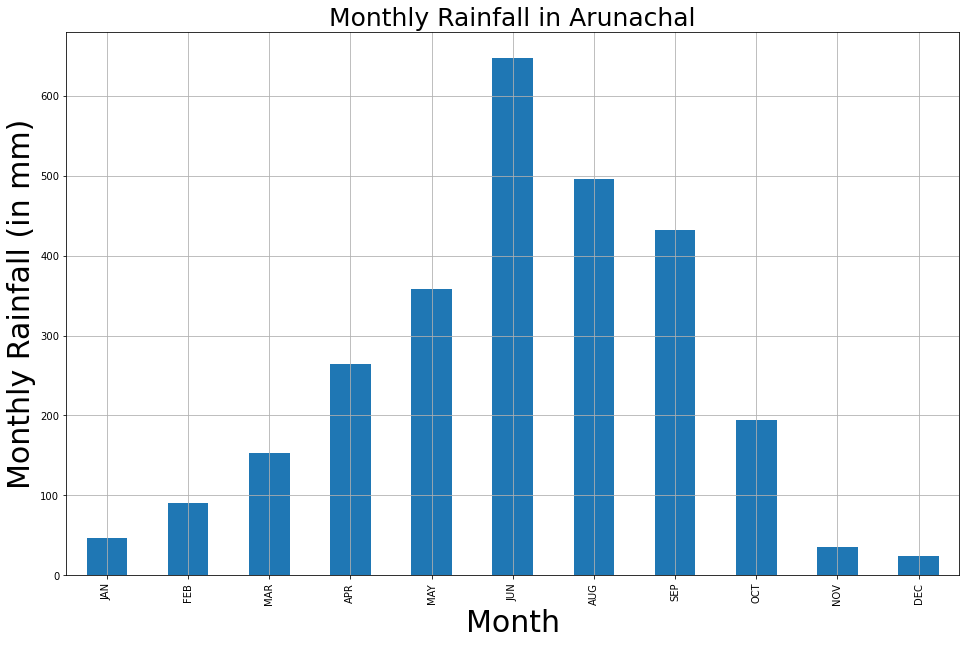

In [18]:
# Average monthly rainfall in Arunachal
ax = Arunachal[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN', 'AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot.bar(width=0.5, linewidth=2, figsize=(16,10))
plt.xlabel('Month',fontsize=30)
plt.ylabel('Monthly Rainfall (in mm)', fontsize=30)
plt.title('Monthly Rainfall in Arunachal', fontsize=25)
ax.tick_params(labelsize=10)
plt.grid()

*All months happen to be rainy in Arunachal Pradesh. Someone is getting wet every month!!!!!.*

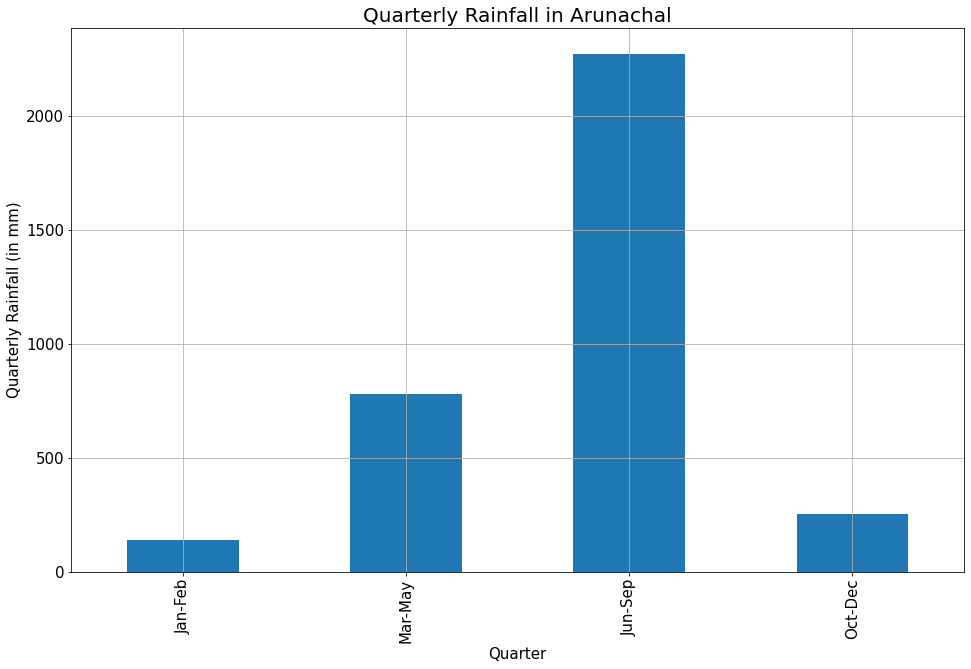

In [19]:
# Average monthly rainfall in Arunachal Pradesh
ax = Arunachal[['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']].mean().plot.bar(width=0.5, linewidth=2, figsize=(16,10))
plt.xlabel('Quarter',fontsize=15)
plt.ylabel('Quarterly Rainfall (in mm)', fontsize=15)
plt.title('Quarterly Rainfall in Arunachal', fontsize=20)
ax.tick_params(labelsize=15)
plt.grid()

*Even Mar-May quarter in Arunachal is receiving more than 20% rainfall than the maximum one recorded in Rajasthan.*

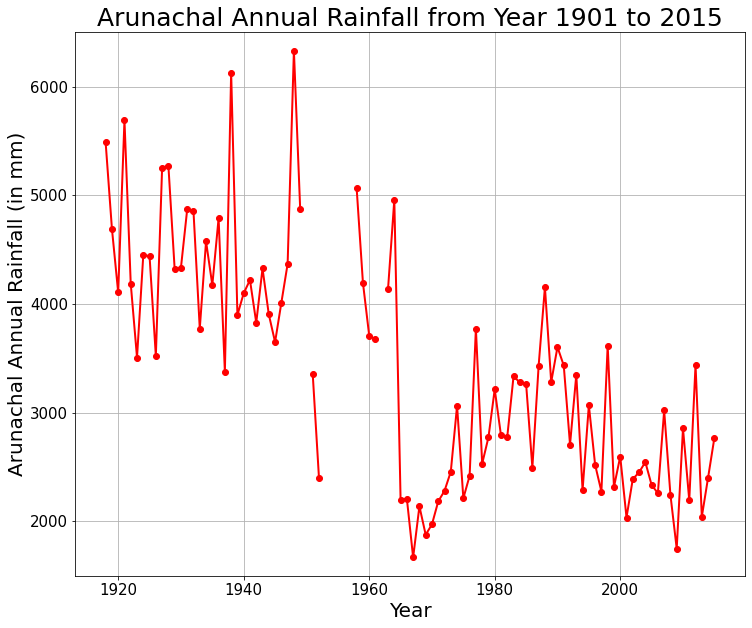

In [20]:
# Visualizing annual rainfall over the years(1901-2015) in Arunachal Pradesh
ax = Arunachal.groupby("YEAR").mean()['ANNUAL'].plot(ylim=(1500,6500),color='r',marker='o',linestyle='-',linewidth=2,figsize=(12,10));
plt.xlabel('Year',fontsize=20)
plt.ylabel('Arunachal Annual Rainfall (in mm)',fontsize=20)
plt.title('Arunachal Annual Rainfall from Year 1901 to 2015',fontsize=25)
ax.tick_params(labelsize=15)
plt.grid()

*Look at the drop in average rainfall over the years, but still it is holding the record of maximum rainfall.*

In [21]:
print('Average annual rainfall received by Arunachal Pradesh = ',int(Arunachal['ANNUAL'].mean()),'mm')
a = Arunachal[Arunachal['YEAR'] == 1948]
a

Average annual rainfall received by Arunachal Pradesh =  3418 mm


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
142,ARUNACHAL PRADESH,1948,35.6,119.5,136.1,441.1,1168.6,889.5,2362.8,603.3,350.4,150.1,52.7,21.4,6331.1,155.1,1745.8,4206.0,224.2


**Let's find out which states and years have recorded the maximum and minimum rainfall in India.**

In [22]:
# Subdivisions receiving maximum and minimum rainfall
print(data.groupby('SUBDIVISION').mean()['ANNUAL'].sort_values(ascending=False).head(10))
print('\n')
print("--------------------------------------------")
print(data.groupby('SUBDIVISION').mean()['ANNUAL'].sort_values(ascending=False).tail(10))

SUBDIVISION
ARUNACHAL PRADESH                     3418.857143
COASTAL KARNATAKA                     3408.409649
KONKAN & GOA                          2977.686087
ANDAMAN & NICOBAR ISLANDS             2927.439423
KERALA                                2925.487826
SUB HIMALAYAN WEST BENGAL & SIKKIM    2752.217391
ASSAM & MEGHALAYA                     2580.695652
NAGA MANI MIZO TRIPURA                2433.619130
LAKSHADWEEP                           1590.886408
GANGETIC WEST BENGAL                  1490.487826
Name: ANNUAL, dtype: float64


--------------------------------------------
SUBDIVISION
MADHYA MAHARASHTRA            880.233043
WEST UTTAR PRADESH            827.114783
MATATHWADA                    790.692174
RAYALSEEMA                    766.206087
NORTH INTERIOR KARNATAKA      717.795652
EAST RAJASTHAN                655.215652
PUNJAB                        593.535652
HARYANA DELHI & CHANDIGARH    530.496522
SAURASHTRA & KUTCH            495.161739
WEST RAJASTHAN                2

*As you can see that the subdivsions receiving maximum rainfall belongs to the southern and eastern parts of India whereas those receiving minimum rainfall belongs to the northern parts of India.*

In [23]:
# Years which recorded maximum and minimum rainfall
print(data.groupby('YEAR').mean()['ANNUAL'].sort_values(ascending=False).head(10))
print('\n')
print("--------------------------------------------")
print(data.groupby('YEAR').mean()['ANNUAL'].sort_values(ascending=False).tail(10))

YEAR
1961    1717.100000
1933    1666.750000
1959    1648.230556
1917    1620.252941
1990    1614.294444
1956    1612.840000
1988    1605.469444
1946    1590.402857
1955    1563.554286
1931    1562.585714
Name: ANNUAL, dtype: float64


--------------------------------------------
YEAR
1911    1259.911429
2014    1244.336111
2012    1243.557143
1904    1236.771429
1979    1217.508333
2009    1192.760000
1965    1188.783333
1905    1186.177143
2002    1148.830556
1972    1146.488889
Name: ANNUAL, dtype: float64


**Hope you liked this notebook and learned something new; if you did, then please vote, it would really mean a lot to me. THANK YOU!!!**